# Q-3 MNIST Classification


Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted a

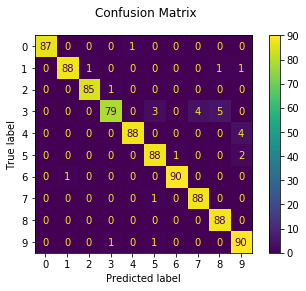

In [9]:
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()

images_and_labels = list(zip(digits.images, digits.target))

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

classifier = svm.SVC(gamma=0.001)

X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

classifier.fit(X_train, y_train)

predicted = classifier.predict(X_test)

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)


In [4]:
import time
stime = time.time()

import struct as st
import numpy as np
filename = {'images' : 'dataset/train-images-idx3-ubyte' ,'labels' : 'dataset/train-labels-idx1-ubyte'}

labels_array = np.array([])

data_types = {
        0x08: ('ubyte', 'B', 1),
        0x09: ('byte', 'b', 1),
        0x0B: ('>i2', 'h', 2),
        0x0C: ('>i4', 'i', 4),
        0x0D: ('>f4', 'f', 4),
        0x0E: ('>f8', 'd', 8)}

for name in filename.keys():
    if name == 'images':
        imagesfile = open(filename[name],'rb')
    if name == 'labels':
        labelsfile = open(filename[name],'rb')

imagesfile.seek(0)
magic = st.unpack('>4B',imagesfile.read(4))
if(magic[0] and magic[1])or(magic[2] not in data_types):
    raise ValueError("File Format not correct")

nDim = magic[3]
print ("Data is ",nDim,"-D")

#offset = 0004 for number of images
#offset = 0008 for number of rows
#offset = 0012 for number of columns
#32-bit integer (32 bits = 4 bytes)
imagesfile.seek(4)
nImg = st.unpack('>I',imagesfile.read(4))[0] #num of images/labels
nR = st.unpack('>I',imagesfile.read(4))[0] #num of rows
nC = st.unpack('>I',imagesfile.read(4))[0] #num of columns
nBytes = nImg*nR*nC
labelsfile.seek(8) #Since no. of items = no. of images and is already read
print ("no. of images :: ",nImg)
print ("no. of rows :: ",nR)
print ("no. of columns :: ",nC)

#Read all data bytes at once and then reshape
images_array = 255 - np.asarray(st.unpack('>'+'B'*nBytes,imagesfile.read(nBytes))).reshape((nImg,nR,nC))
labels_array = np.asarray(st.unpack('>'+'B'*nImg,labelsfile.read(nImg))).reshape((nImg,1))

print (labels_array)
print (labels_array.shape)
print (images_array.shape)

Data is  3 -D
no. of images ::  60000
no. of rows ::  28
no. of columns ::  28
[[5]
 [0]
 [4]
 ...
 [5]
 [6]
 [8]]
(60000, 1)
(60000, 28, 28)


In [5]:
from mnist import MNIST
mndata = MNIST('./dataset')
images_array, labels_array = mndata.load_training()
print(np.shape(images_array))

(60000, 784)


In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [7]:
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)

NameError: name 'Net' is not defined

In [10]:
BATCH_SIZE = 32
X_train, X_test, y_train, y_test = train_test_split(np.asarray(images_array), np.asarray(labels_array), test_size=0.20)


###############
# Reshaping the array to 4-dims so that it can work with the Keras API
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
y_train = y_train.reshape(y_train.shape[0])
y_test = y_test.reshape(y_test.shape[0])
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
X_train /= 255
X_test /= 255
print('x_train shape:', X_train.shape)
print('Number of images in x_train', X_train.shape[0])
print('Number of images in x_test', X_test.shape[0])
##############


torch_X_train = torch.from_numpy(X_train).type(torch.FloatTensor)
torch_y_train = torch.from_numpy(y_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
torch_X_test = torch.from_numpy(X_test).type(torch.FloatTensor)
torch_y_test = torch.from_numpy(y_test).type(torch.LongTensor) # data type is long

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(torch_X_train,torch_y_train)
test = torch.utils.data.TensorDataset(torch_X_test,torch_y_test)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = BATCH_SIZE, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = BATCH_SIZE, shuffle = False)


x_train shape: (48000, 1, 28, 28)
Number of images in x_train 48000
Number of images in x_test 12000


In [13]:
n_epochs = 8
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.001
momentum = 0.5
log_interval = 10

#random_seed = 1
#torch.backends.cudnn.enabled = False
#torch.manual_seed(random_seed)

In [11]:
class Net(nn.Module):
    '''
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)
    '''
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softm

In [12]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(images_array) for i in range(n_epochs + 1)]

NameError: name 'n_epochs' is not defined

In [150]:
def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      torch.save(network.state_dict(), 'results/model.pth')
      torch.save(optimizer.state_dict(), 'results/optimizer.pth')

In [151]:
def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      #print(data.shape)
      #print(np.shape(target))
      #print(data)
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [156]:
test()
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.



Test set: Avg. loss: 0.0631, Accuracy: 11778/12000 (98%)

Train Epoch: 1 [0/48000 (0%)]	Loss: 0.072026
Train Epoch: 1 [320/48000 (1%)]	Loss: 0.123443
Train Epoch: 1 [640/48000 (1%)]	Loss: 0.301143
Train Epoch: 1 [960/48000 (2%)]	Loss: 0.373130
Train Epoch: 1 [1280/48000 (3%)]	Loss: 0.089081
Train Epoch: 1 [1600/48000 (3%)]	Loss: 0.072239
Train Epoch: 1 [1920/48000 (4%)]	Loss: 0.093461
Train Epoch: 1 [2240/48000 (5%)]	Loss: 0.170384
Train Epoch: 1 [2560/48000 (5%)]	Loss: 0.033313
Train Epoch: 1 [2880/48000 (6%)]	Loss: 0.371169
Train Epoch: 1 [3200/48000 (7%)]	Loss: 0.736870
Train Epoch: 1 [3520/48000 (7%)]	Loss: 0.202190
Train Epoch: 1 [3840/48000 (8%)]	Loss: 0.154878
Train Epoch: 1 [4160/48000 (9%)]	Loss: 0.039820
Train Epoch: 1 [4480/48000 (9%)]	Loss: 0.157338
Train Epoch: 1 [4800/48000 (10%)]	Loss: 0.155420
Train Epoch: 1 [5120/48000 (11%)]	Loss: 0.237298
Train Epoch: 1 [5440/48000 (11%)]	Loss: 0.168843
Train Epoch: 1 [5760/48000 (12%)]	Loss: 0.199134
Train Epoch: 1 [6080/48000 (13%

Train Epoch: 2 [4800/48000 (10%)]	Loss: 0.168388
Train Epoch: 2 [5120/48000 (11%)]	Loss: 0.137455
Train Epoch: 2 [5440/48000 (11%)]	Loss: 0.188523
Train Epoch: 2 [5760/48000 (12%)]	Loss: 0.096447
Train Epoch: 2 [6080/48000 (13%)]	Loss: 0.036169
Train Epoch: 2 [6400/48000 (13%)]	Loss: 0.435329
Train Epoch: 2 [6720/48000 (14%)]	Loss: 0.256864
Train Epoch: 2 [7040/48000 (15%)]	Loss: 0.181404
Train Epoch: 2 [7360/48000 (15%)]	Loss: 0.362229
Train Epoch: 2 [7680/48000 (16%)]	Loss: 0.196858
Train Epoch: 2 [8000/48000 (17%)]	Loss: 0.163548
Train Epoch: 2 [8320/48000 (17%)]	Loss: 0.124897
Train Epoch: 2 [8640/48000 (18%)]	Loss: 0.045219
Train Epoch: 2 [8960/48000 (19%)]	Loss: 0.112113
Train Epoch: 2 [9280/48000 (19%)]	Loss: 0.165372
Train Epoch: 2 [9600/48000 (20%)]	Loss: 0.182852
Train Epoch: 2 [9920/48000 (21%)]	Loss: 0.349471
Train Epoch: 2 [10240/48000 (21%)]	Loss: 0.048450
Train Epoch: 2 [10560/48000 (22%)]	Loss: 0.160364
Train Epoch: 2 [10880/48000 (23%)]	Loss: 0.045970
Train Epoch: 2 [1

Train Epoch: 3 [10240/48000 (21%)]	Loss: 0.130367
Train Epoch: 3 [10560/48000 (22%)]	Loss: 0.049794
Train Epoch: 3 [10880/48000 (23%)]	Loss: 0.069275
Train Epoch: 3 [11200/48000 (23%)]	Loss: 0.117552
Train Epoch: 3 [11520/48000 (24%)]	Loss: 0.524462
Train Epoch: 3 [11840/48000 (25%)]	Loss: 0.138219
Train Epoch: 3 [12160/48000 (25%)]	Loss: 0.110955
Train Epoch: 3 [12480/48000 (26%)]	Loss: 0.443587
Train Epoch: 3 [12800/48000 (27%)]	Loss: 0.098075
Train Epoch: 3 [13120/48000 (27%)]	Loss: 0.262783
Train Epoch: 3 [13440/48000 (28%)]	Loss: 0.086962
Train Epoch: 3 [13760/48000 (29%)]	Loss: 0.014611
Train Epoch: 3 [14080/48000 (29%)]	Loss: 0.049096
Train Epoch: 3 [14400/48000 (30%)]	Loss: 0.031840
Train Epoch: 3 [14720/48000 (31%)]	Loss: 0.031492
Train Epoch: 3 [15040/48000 (31%)]	Loss: 0.090499
Train Epoch: 3 [15360/48000 (32%)]	Loss: 0.102542
Train Epoch: 3 [15680/48000 (33%)]	Loss: 0.125861
Train Epoch: 3 [16000/48000 (33%)]	Loss: 0.072882
Train Epoch: 3 [16320/48000 (34%)]	Loss: 0.019578


Train Epoch: 4 [15040/48000 (31%)]	Loss: 0.110702
Train Epoch: 4 [15360/48000 (32%)]	Loss: 0.225938
Train Epoch: 4 [15680/48000 (33%)]	Loss: 0.072283
Train Epoch: 4 [16000/48000 (33%)]	Loss: 0.062993
Train Epoch: 4 [16320/48000 (34%)]	Loss: 0.085909
Train Epoch: 4 [16640/48000 (35%)]	Loss: 0.766766
Train Epoch: 4 [16960/48000 (35%)]	Loss: 0.136714
Train Epoch: 4 [17280/48000 (36%)]	Loss: 0.287591
Train Epoch: 4 [17600/48000 (37%)]	Loss: 0.156702
Train Epoch: 4 [17920/48000 (37%)]	Loss: 0.151729
Train Epoch: 4 [18240/48000 (38%)]	Loss: 0.096994
Train Epoch: 4 [18560/48000 (39%)]	Loss: 0.141897
Train Epoch: 4 [18880/48000 (39%)]	Loss: 0.190146
Train Epoch: 4 [19200/48000 (40%)]	Loss: 0.050476
Train Epoch: 4 [19520/48000 (41%)]	Loss: 0.140200
Train Epoch: 4 [19840/48000 (41%)]	Loss: 0.065793
Train Epoch: 4 [20160/48000 (42%)]	Loss: 0.122999
Train Epoch: 4 [20480/48000 (43%)]	Loss: 0.149316
Train Epoch: 4 [20800/48000 (43%)]	Loss: 0.452724
Train Epoch: 4 [21120/48000 (44%)]	Loss: 0.124341


Train Epoch: 5 [19520/48000 (41%)]	Loss: 0.317223
Train Epoch: 5 [19840/48000 (41%)]	Loss: 0.092994
Train Epoch: 5 [20160/48000 (42%)]	Loss: 0.069077
Train Epoch: 5 [20480/48000 (43%)]	Loss: 0.190121
Train Epoch: 5 [20800/48000 (43%)]	Loss: 0.121488
Train Epoch: 5 [21120/48000 (44%)]	Loss: 0.286968
Train Epoch: 5 [21440/48000 (45%)]	Loss: 0.078173
Train Epoch: 5 [21760/48000 (45%)]	Loss: 0.350595
Train Epoch: 5 [22080/48000 (46%)]	Loss: 0.150840
Train Epoch: 5 [22400/48000 (47%)]	Loss: 0.169016
Train Epoch: 5 [22720/48000 (47%)]	Loss: 0.130682
Train Epoch: 5 [23040/48000 (48%)]	Loss: 0.147198
Train Epoch: 5 [23360/48000 (49%)]	Loss: 0.393828
Train Epoch: 5 [23680/48000 (49%)]	Loss: 0.375781
Train Epoch: 5 [24000/48000 (50%)]	Loss: 0.085122
Train Epoch: 5 [24320/48000 (51%)]	Loss: 0.317714
Train Epoch: 5 [24640/48000 (51%)]	Loss: 0.047291
Train Epoch: 5 [24960/48000 (52%)]	Loss: 0.062310
Train Epoch: 5 [25280/48000 (53%)]	Loss: 0.074386
Train Epoch: 5 [25600/48000 (53%)]	Loss: 0.036557


Train Epoch: 6 [24640/48000 (51%)]	Loss: 0.320725
Train Epoch: 6 [24960/48000 (52%)]	Loss: 0.111146
Train Epoch: 6 [25280/48000 (53%)]	Loss: 0.245680
Train Epoch: 6 [25600/48000 (53%)]	Loss: 0.097493
Train Epoch: 6 [25920/48000 (54%)]	Loss: 0.021266
Train Epoch: 6 [26240/48000 (55%)]	Loss: 0.023429
Train Epoch: 6 [26560/48000 (55%)]	Loss: 0.188963
Train Epoch: 6 [26880/48000 (56%)]	Loss: 0.014442
Train Epoch: 6 [27200/48000 (57%)]	Loss: 0.179947
Train Epoch: 6 [27520/48000 (57%)]	Loss: 0.247581
Train Epoch: 6 [27840/48000 (58%)]	Loss: 0.028440
Train Epoch: 6 [28160/48000 (59%)]	Loss: 0.034843
Train Epoch: 6 [28480/48000 (59%)]	Loss: 0.182233
Train Epoch: 6 [28800/48000 (60%)]	Loss: 0.170538
Train Epoch: 6 [29120/48000 (61%)]	Loss: 0.429663
Train Epoch: 6 [29440/48000 (61%)]	Loss: 0.296775
Train Epoch: 6 [29760/48000 (62%)]	Loss: 0.116226
Train Epoch: 6 [30080/48000 (63%)]	Loss: 0.197680
Train Epoch: 6 [30400/48000 (63%)]	Loss: 0.041759
Train Epoch: 6 [30720/48000 (64%)]	Loss: 0.109372


Train Epoch: 7 [29440/48000 (61%)]	Loss: 0.099563
Train Epoch: 7 [29760/48000 (62%)]	Loss: 0.064881
Train Epoch: 7 [30080/48000 (63%)]	Loss: 0.064099
Train Epoch: 7 [30400/48000 (63%)]	Loss: 0.010737
Train Epoch: 7 [30720/48000 (64%)]	Loss: 0.128034
Train Epoch: 7 [31040/48000 (65%)]	Loss: 0.037423
Train Epoch: 7 [31360/48000 (65%)]	Loss: 0.091027
Train Epoch: 7 [31680/48000 (66%)]	Loss: 0.133221
Train Epoch: 7 [32000/48000 (67%)]	Loss: 0.111575
Train Epoch: 7 [32320/48000 (67%)]	Loss: 0.087488
Train Epoch: 7 [32640/48000 (68%)]	Loss: 0.175623
Train Epoch: 7 [32960/48000 (69%)]	Loss: 0.114222
Train Epoch: 7 [33280/48000 (69%)]	Loss: 0.188909
Train Epoch: 7 [33600/48000 (70%)]	Loss: 0.064797
Train Epoch: 7 [33920/48000 (71%)]	Loss: 0.038097
Train Epoch: 7 [34240/48000 (71%)]	Loss: 0.256574
Train Epoch: 7 [34560/48000 (72%)]	Loss: 0.119418
Train Epoch: 7 [34880/48000 (73%)]	Loss: 0.081942
Train Epoch: 7 [35200/48000 (73%)]	Loss: 0.026818
Train Epoch: 7 [35520/48000 (74%)]	Loss: 0.353556


Train Epoch: 8 [34240/48000 (71%)]	Loss: 0.379749
Train Epoch: 8 [34560/48000 (72%)]	Loss: 0.134426
Train Epoch: 8 [34880/48000 (73%)]	Loss: 0.120040
Train Epoch: 8 [35200/48000 (73%)]	Loss: 0.038985
Train Epoch: 8 [35520/48000 (74%)]	Loss: 0.204851
Train Epoch: 8 [35840/48000 (75%)]	Loss: 0.036433
Train Epoch: 8 [36160/48000 (75%)]	Loss: 0.062215
Train Epoch: 8 [36480/48000 (76%)]	Loss: 0.073998
Train Epoch: 8 [36800/48000 (77%)]	Loss: 0.107077
Train Epoch: 8 [37120/48000 (77%)]	Loss: 0.190418
Train Epoch: 8 [37440/48000 (78%)]	Loss: 0.071615
Train Epoch: 8 [37760/48000 (79%)]	Loss: 0.112528
Train Epoch: 8 [38080/48000 (79%)]	Loss: 0.286943
Train Epoch: 8 [38400/48000 (80%)]	Loss: 0.044683
Train Epoch: 8 [38720/48000 (81%)]	Loss: 0.098783
Train Epoch: 8 [39040/48000 (81%)]	Loss: 0.172191
Train Epoch: 8 [39360/48000 (82%)]	Loss: 0.102480
Train Epoch: 8 [39680/48000 (83%)]	Loss: 0.156222
Train Epoch: 8 [40000/48000 (83%)]	Loss: 0.115131
Train Epoch: 8 [40320/48000 (84%)]	Loss: 0.114438


In [41]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)
    
def train(epoch):
  network.train()
  train_counter = []
  train_losses = []
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      #print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
      #  epoch, batch_idx * len(data), len(train_loader.dataset),
      #  100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      
def test_():
  network.eval()
  test_loss = 0
  correct = 0
  pred = []
  with torch.no_grad():
    for data, target in test_loader:
      #print(data.shape)
      #print(np.shape(target))
      #print(data)
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred.append(output.data.max(1, keepdim=True)[1])
  return pred
  '''
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))
  '''

n_epochs = 8
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.001
momentum = 0.5
log_interval = 1000

network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)

from mnist import MNIST
import numpy as np
mndata = MNIST('./dataset')
images_array, labels_array = mndata.load_training()
images_array = np.asarray(images_array)
labels_array = np.asarray(labels_array)
#print(np.shape(images_array))

BATCH_SIZE = 32
X_train = images_array.reshape(images_array.shape[0], 1, 28, 28)

y_train = labels_array.reshape(labels_array .shape[0])

input_shape = (28, 28, 1)

X_train = X_train.astype('float32')

X_train /= 255

torch_X_train = torch.from_numpy(X_train).type(torch.FloatTensor)
torch_y_train = torch.from_numpy(y_train).type(torch.LongTensor) 

training = torch.utils.data.TensorDataset(torch_X_train,torch_y_train)

train_loader = torch.utils.data.DataLoader(training, batch_size = BATCH_SIZE, shuffle = False)

for epoch in range(1, n_epochs + 1):
  train(epoch)
  
X_test, y_test = mndata.load_testing()
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
X_test = X_test.astype('float32')
X_test /= 255
y_test = y_test.reshape(y_test.shape[0])
torch_X_test = torch.from_numpy(X_test).type(torch.FloatTensor)
torch_y_test = torch.from_numpy(y_test).type(torch.LongTensor)
test = torch.utils.data.TensorDataset(torch_X_test,torch_y_test)
test_loader = torch.utils.data.DataLoader(test, batch_size = 1, shuffle = False)

y_pred = test_()
y_pred = np.array(y_pred)
y_pred = y_pred.flatten()
#y_pred = [i.tolist() for i in y_pred]
#y_pred = [item for sublist in y_pred for item in sublist]
print(*y_pred, sep='\n')
#test = torch.utils.data.TensorDataset(torch_X_test,torch_y_test)
#test_loader = torch.utils.data.DataLoader(test, batch_size = BATCH_SIZE, shuffle = False)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:23: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


7
2
1
0
4
1
4
9
2
9
0
6
9
0
1
3
9
7
3
4
9
6
6
5
4
0
7
4
0
1
3
1
3
6
7
2
7
1
2
1
1
7
4
6
3
5
3
2
4
4
6
3
5
5
6
0
4
1
4
9
7
8
4
2
7
4
6
4
3
0
7
0
2
7
1
7
3
7
9
7
9
6
2
7
8
4
7
3
6
1
3
6
4
3
1
4
3
9
6
9
6
0
5
4
4
9
2
1
9
4
8
1
3
9
2
4
4
4
9
2
5
6
7
6
7
9
0
5
8
5
6
6
5
7
8
1
0
1
6
4
6
7
3
1
9
1
8
2
0
4
4
9
5
5
1
5
6
0
3
4
4
6
5
4
6
3
4
4
1
4
4
7
2
3
2
1
1
8
1
8
1
3
5
0
3
4
2
3
0
1
1
1
0
4
0
1
1
6
4
2
3
6
1
1
1
3
9
5
2
9
4
5
9
1
9
0
3
5
9
5
7
2
2
7
1
2
3
4
1
7
3
3
6
7
7
9
2
2
4
1
5
3
8
4
2
6
0
6
4
2
4
1
9
5
7
7
2
1
2
0
8
1
7
7
9
1
5
1
8
0
3
0
1
9
9
4
1
8
2
1
2
4
1
5
9
2
6
4
1
5
4
2
9
2
0
4
0
0
2
3
1
2
1
2
4
0
2
9
4
3
3
0
0
3
1
9
6
4
6
6
1
7
9
3
0
4
2
0
7
1
1
2
1
5
3
3
9
7
0
6
3
4
1
3
5
1
0
5
1
7
1
5
0
6
1
8
5
1
7
9
4
6
7
2
5
0
6
5
6
3
7
2
0
8
8
5
4
1
1
4
0
7
3
7
6
1
6
2
1
9
2
8
6
1
9
5
2
5
4
4
2
3
3
9
2
4
0
0
3
1
7
7
3
7
9
7
1
9
2
1
4
2
9
2
0
4
9
1
4
8
1
8
4
9
9
7
8
3
7
6
0
0
3
5
2
0
6
4
8
3
3
3
2
3
9
1
3
5
8
0
9
6
6
6
7
7
8
2
9
5
8
7
6
1
8
4
1
2
6
3
1
9
7
5
4
0
4
9
9
1
0
5
2
3
7
6
9
9
0
6


1
3
0
4
1
0
1
7
7
9
6
4
9
9
2
1
6
1
3
5
2
1
9
7
6
4
5
7
6
1
9
9
6
3
6
2
9
8
1
2
2
5
9
2
3
7
2
1
0
1
0
4
5
2
0
2
3
3
5
1
7
7
1
1
2
9
7
8
4
6
3
0
7
6
3
4
7
7
8
5
3
6
9
3
1
1
8
0
3
1
7
9
5
5
1
6
5
7
4
9
3
5
4
7
1
2
0
1
1
6
0
7
3
4
7
9
9
6
0
5
6
4
8
7
7
4
3
8
6
9
7
2
3
4
0
2
1
3
5
5
5
7
1
4
0
7
6
8
3
0
8
7
8
6
0
9
4
4
6
3
5
6
6
3
0
9
3
1
5
2
9
3
4
9
0
8
9
1
2
1
8
6
6
1
3
7
9
0
1
1
4
7
0
9
1
7
4
5
7
1
2
1
1
3
0
6
6
1
2
4
5
7
6
6
9
3
1
0
0
2
6
0
5
4
3
8
4
6
1
2
7
9
5
1
3
2
4
3
6
1
4
4
4
7
6
5
4
1
9
9
2
7
3
0
1
3
6
1
1
6
1
1
1
5
6
0
7
0
7
2
3
2
5
2
2
9
4
9
8
1
3
1
5
1
2
7
4
0
0
0
8
2
2
9
2
2
1
4
0
2
7
5
1
3
4
9
4
1
7
5
6
2
8
3
1
6
8
6
7
9
1
7
0
7
7
2
3
2
4
0
3
4
4
8
4
1
0
6
0
9
6
8
6
1
1
4
8
4
2
3
3
3
9
4
2
1
9
4
3
9
6
0
4
0
6
0
1
2
2
4
7
8
7
0
1
2
2
4
7
8
9
0
1
2
3
4
8
6
7
8
9
3
8
4
7
1
6
2
1
0
9
7
1
9
3
1
4
7
2
0
9
1
4
8
4
6
6
0
6
2
1
1
1
1
7
2
4
7
5
2
4
4
5
8
4
2
9
7
0
0
7
8
1
1
7
6
6
6
1
2
2
7
7
4
0
2
4
2
1
8
9
6
1
0
8
4
6
9
8
0
2
0
8
6
9
6
8
0
1
2
3
4
5
6
7
0
1
2
3
9
5
6
7
6
9
0
1
2
3
4


In [34]:
import sys
tensor = tf.range(10)
tf.print(tensor, output_stream=sys.stdout)


NameError: name 'tf' is not defined